<a href="https://colab.research.google.com/github/iamgchattejee/Fruit-Freshness-Prediction/blob/main/Custom_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Required Libraries**

In [ ]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV
import seaborn as sns

**Loading data**

In [ ]:
DIRECTORY = '/content/drive/MyDrive/Colab Notebooks/Amloki-classified'

CATEGORIES = ['BAD', 'FRESH']

**Preprocessing our data**

In [ ]:
data = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        label = CATEGORIES.index(category)
        arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        new_arr = cv2.resize(arr, (224, 224))
        data.append([new_arr, label])

In [ ]:
X = []
y = []

IMG_SIZE=224
for features, label in data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y = np.array(y)

In [ ]:
import pickle
pickle.dump(X, open('/content/drive/MyDrive/X1.pkl', 'wb'))
pickle.dump(y, open('/content/drive/MyDrive/y1.pkl', 'wb'))

In [ ]:
import pickle
pickle_in=open('/content/drive/MyDrive/X1.pkl', 'rb')
X=pickle.load(pickle_in)

pickle_in=open('/content/drive/MyDrive/y1.pkl', 'rb')
y=pickle.load(pickle_in)
print(len(X))
print(len(y))


279
279


**Splitting Train and Test set**

In [ ]:
from sklearn.model_selection import train_test_split
(trainX, testX, trainY, testY) = train_test_split(X, y,
	test_size=0.20, stratify=y, random_state=42)

print("Train Set Length: {} \nTest Set Length: {}".format(len(trainY), len(testY)))

print(trainY)
print(testY)

Train Set Length: 223 
Test Set Length: 56
[1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1
 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1
 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1]


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from tensorflow.python.keras import regularizers
train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 251
nb_validation_samples = 28
epochs = 50
batch_size = 10

trainx=trainX/255.0

**Buiding our model**

In [ ]:


model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=trainx.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(32, (3, 3), kernel_regularizer=regularizers.l2(l=0.10)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(l=0.25)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])    

history=model.fit(trainX,trainY,batch_size,epochs,validation_split=0.15)






Epoch 1/50
19/19 [==============================] - 2s 41ms/step - loss: 36.6721 - accuracy: 0.6296 - val_loss: 10.5108 - val_accuracy: 0.8824
Epoch 2/50
19/19 [==============================] - 0s 20ms/step - loss: 9.8043 - accuracy: 0.7937 - val_loss: 9.7940 - val_accuracy: 0.9118
Epoch 3/50
19/19 [==============================] - 0s 20ms/step - loss: 9.9417 - accuracy: 0.7778 - val_loss: 6.7671 - val_accuracy: 0.9118
Epoch 4/50
19/19 [==============================] - 0s 20ms/step - loss: 6.2334 - accuracy: 0.7566 - val_loss: 5.0656 - val_accuracy: 0.9118
Epoch 5/50
19/19 [==============================] - 0s 22ms/step - loss: 5.1062 - accuracy: 0.7937 - val_loss: 3.9952 - val_accuracy: 0.9118
Epoch 6/50
19/19 [==============================] - 0s 20ms/step - loss: 4.3880 - accuracy: 0.7354 - val_loss: 2.9626 - val_accuracy: 0.9118
Epoch 7/50
19/19 [==============================] - 0s 20ms/step - loss: 3.7450 - accuracy: 0.7249 - val_loss: 2.3375 - val_accuracy: 0.8824
Epoch 8/50


In [ ]:
from keras.models import model_from_json
json_model = model.to_json()

with open('/content/drive/MyDrive/fruit_model.json', 'w') as json_file:
    json_file.write(json_model)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  roc_auc_score
import tensorflow as tf
from tensorflow import keras

**Pedicting on test set**

In [ ]:


y_pred=(model.predict(testX) > 0.5).astype("int32")
print(y_pred)
print(testY)


[[1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]]
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1
 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1]


**TEST REPORT**

______________Test Results______________
              precision    recall  f1-score   support

         BAD       1.00      0.92      0.96        12
       FRESH       0.98      1.00      0.99        44

    accuracy                           0.98        56
   macro avg       0.99      0.96      0.97        56
weighted avg       0.98      0.98      0.98        56

ROC_AUC Score:  0.9583333333333333
Confusion Matrix.......


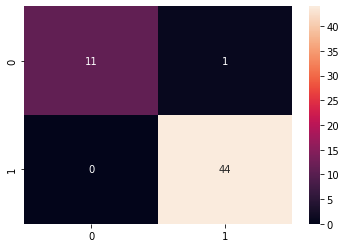

In [ ]:
print("______________Test Results______________")
print(classification_report(testY, y_pred, target_names=CATEGORIES))
print("ROC_AUC Score: ",roc_auc_score(testY, y_pred))
cf_matrix=confusion_matrix(testY, y_pred)
print("Confusion Matrix.......")
sns.heatmap(cf_matrix, annot=True)


**Plotting acuracy and loss curves**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


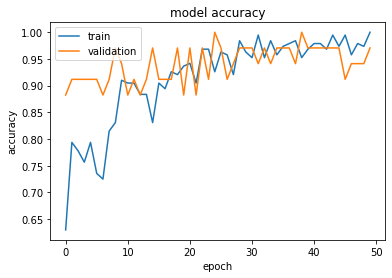

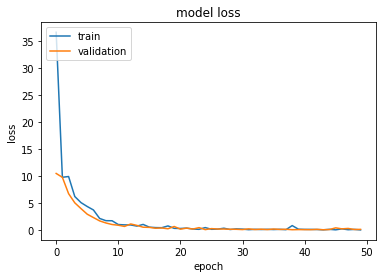

In [ ]:
print(history.history.keys())
#  "Accuracy"
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Saving Model**

In [ ]:
model.save('/content/drive/MyDrive/amloki_model_7.h5') 

In [ ]:
testY
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 64)      640       
                                                                 
 activation_6 (Activation)   (None, 222, 222, 64)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 activation_7 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                  

**Model Architecture**

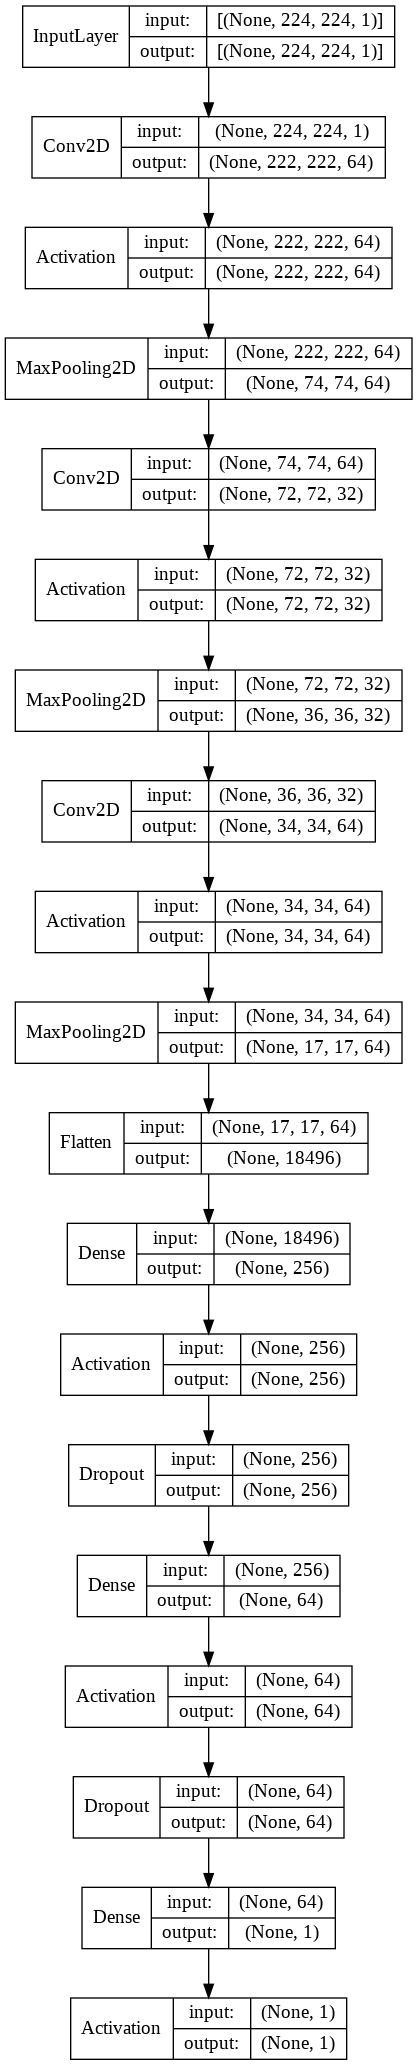

In [ ]:

from keras.utils.vis_utils import plot_model
plot_model(model, to_file='Custom_Model_Dig.png', show_shapes=True, show_layer_names=False)


In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/amloki_model_7.h5')
history1=new_model.fit(trainX,trainY,batch_size,epochs,validation_split=0.15)

Epoch 1/50
19/19 [==============================] - 2s 56ms/step - loss: 0.0904 - accuracy: 0.9841 - val_loss: 0.1540 - val_accuracy: 0.9706
Epoch 2/50
19/19 [==============================] - 1s 40ms/step - loss: 0.1424 - accuracy: 0.9788 - val_loss: 0.2732 - val_accuracy: 0.9412
Epoch 3/50
19/19 [==============================] - 1s 40ms/step - loss: 0.0806 - accuracy: 0.9894 - val_loss: 0.1491 - val_accuracy: 0.9412
Epoch 4/50
19/19 [==============================] - 1s 40ms/step - loss: 0.0507 - accuracy: 1.0000 - val_loss: 0.1788 - val_accuracy: 0.9706
Epoch 5/50
19/19 [==============================] - 1s 40ms/step - loss: 0.1328 - accuracy: 0.9735 - val_loss: 0.1650 - val_accuracy: 0.9706
Epoch 6/50
19/19 [==============================] - 1s 40ms/step - loss: 0.0740 - accuracy: 0.9947 - val_loss: 0.0864 - val_accuracy: 0.9706
Epoch 7/50
19/19 [==============================] - 1s 41ms/step - loss: 0.0779 - accuracy: 0.9841 - val_loss: 0.1882 - val_accuracy: 0.9706
Epoch 8/50
19

In [ ]:
y_predict1=(new_model.predict(trainX) > 0.5).astype("int32")

**Train Results**

______________Validation Results______________
              precision    recall  f1-score   support

         BAD       0.84      1.00      0.92        49
       FRESH       1.00      0.95      0.97       174

    accuracy                           0.96       223
   macro avg       0.92      0.97      0.94       223
weighted avg       0.97      0.96      0.96       223

ROC_AUC Score:  0.9741379310344828
Confusion Matrix.......


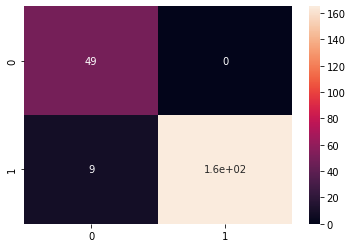

In [ ]:
print("______________Validation Results______________")
print(classification_report(trainY, y_predict1, target_names=CATEGORIES))
print("ROC_AUC Score: ",roc_auc_score(trainY, y_predict1))
cf_matrix=confusion_matrix(trainY, y_predict1)
print("Confusion Matrix.......")
sns.heatmap(cf_matrix, annot=True)